<a href="https://colab.research.google.com/github/jeperniag/BussinessIntelligence/blob/main/Proyecto_Final_Alejandro_Mariaca_y_Juan_Esteban_Pern%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo de Clasificación Árboles de Decisión**

In [ ]:
!pip install tensorflow

0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd


#Librerías del árbol
from  sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Conectar al Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los datos

In [ ]:
nxl='/content/drive/MyDrive/alzheimers_disease_data.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()

display(XDB.head(100))

total_filas = XDB.shape[0]
print(f"El número total de datos en la base de datos es: {total_filas}")

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22927749230993800,0,1329721772827680,6327112473553350,13472143059081000,...,0,0,17258834599441800,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,2682768119159600,0,45425238177221904,7619884540163030,5187671386507050,...,0,0,25924241326736400,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17795882442817100,0,1955508452555350,7844987790974510,1826334664579780,...,0,0,7119547742738570,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,3380081704413540,1,12209265546203700,8428001350491490,743560414000302,...,0,1,648122585936608,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20716973826446800,0,18454356090619600,6310460689360430,7954975089177470,...,0,0,14691221285652000,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4846,90,1,0,1,32717031626728900,0,16573517262715900,3835697959826410,7504739741699510,...,0,0,4678015639970980,0,0,1,0,0,0,XXXConfid
96,4847,64,0,0,2,2716284609940700,1,14347898339739100,2519586929288690,6073423271250680,...,1,0,9184213702086350,1,0,0,0,0,0,XXXConfid
97,4848,67,1,0,2,22978765833980800,0,11070171321401500,5141054569985360,7687968843557440,...,0,0,7618158264409220,0,0,0,0,0,0,XXXConfid
98,4849,88,0,3,0,22721826997949100,1,13711095159361400,2948416555565900,7885581203029000,...,1,0,24421130843733800,0,0,0,0,0,1,XXXConfid


El número total de datos en la base de datos es: 2149


2. Se crea el modelo Árboles de Decisión

In [ ]:
# Seleccionar las variables de entrada
XD = XDB[['Age','MemoryComplaints','BehavioralProblems','Confusion','DifficultyCompletingTasks']]

display(XD.head())

#Variable salida
yd = XDB[['Diagnosis']]


,Age,MemoryComplaints,BehavioralProblems,Confusion,DifficultyCompletingTasks
0,73,0,0,0,1
1,89,0,0,0,0
2,73,0,0,0,1
3,74,0,1,0,0
4,89,0,0,0,1


**Explicación de la base de datos y sus variables**

La base de datos se carga desde un archivo de Excel. Esta está diseñada para el estudio y diagnóstico de las personas que puedan tener la enfermedad de Alzheimer. Allí se puede encontrar diferentes variables como Edad, Quejas de memoria, Problemas de comportamiento, Confusión, Dificultad para completar tareas y Diagnóstico.

* Age (Edad): Es un valor número que indica la edad de la persona en el momento del estudio. Esta es una variable importante en el estudio ya que el riesgo de desarrollar la enfermedad aumenta con la edad de forma significativa.
* MemoryComplaints (Quejas de memoria): Es una variable categórica donde basicamente si el paciente tiene 1 significa problemas de memoria, y si tiene 0 es porque no los tiene.
* BehavioralProblems (Problemas de comportamiento): Es otra variable categórica, que indica si la persona presenta ciertos problemas de comportamientos que no son típicos de su estado habital, problemas que pueden ser desde irritabilidad hasta cambios en la personalidad. Si= 1 y No=0.
* Confusion (Confusión): Es otra variable categórica que señala si la persona ha experimentado episodios de confusión y/o desorientación. Si= 1 y No=0.
* DifficultyCompletingTasks (Dificultad para completar tareas): Otra variable categórica que indica si la persona tiene problemas para realizar actividades diarias que antes podía hacer sin dificultad. Si=1 y No=0.
* Diagnosis (Diagnóstico): Esta es la variable de salida de la base de datos, donde indica si la persona fue diagnositicada con la enfermedad de Alzheimer. Si=1 y No=0.

2.1 Se procede con la implementación del modelo

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ve=['Age','MemoryComplaints','BehavioralProblems','Confusion','DifficultyCompletingTasks']
dot_data=export_graphviz(mar, feature_names=ve)
graph=graph_from_dot_data(dot_data)
graph.write_png('ArbolDecision.png')


True

2.2 Se determina el número de nodos puros para el árbol

In [ ]:
num_nodos_puros = sum(mar.tree_.impurity == 0)
print(f"Número de nodos puros en el árbol (Gini = 0.0): {num_nodos_puros}")

Número de nodos puros en el árbol (Gini = 0.0): 1


2.3 Se procede con el pronóstico de personas sin Alzheimer

In [ ]:
nxl ='/content/drive/MyDrive/alzheimers_disease_data.xlsx'
XDB0 = pd.read_excel(nxl)
XDB0=XDB0.dropna()

# Seleccionar las variables de entrada
XD0 = XDB0[['Age','MemoryComplaints','BehavioralProblems','Confusion','DifficultyCompletingTasks']]

display(XD0.head())

#Variable salida
yd0 = XDB0[['Diagnosis']]


# Mantener todos las personas
filas = XDB0.index

# Hacer la predicción
y_pred = mar.predict(XD0)

# Crear el informe en Excel
df = pd.DataFrame(XD0)
df["Diagnosis_Predicted"] = y_pred
df.insert(0, "Paciente", filas)  # Agregar índice de paciente

# Guardar en Excel
df.to_excel("Pronostico_Alzheimer.xlsx", index=False)

,Age,MemoryComplaints,BehavioralProblems,Confusion,DifficultyCompletingTasks
0,73,0,0,0,1
1,89,0,0,0,0
2,73,0,0,0,1
3,74,0,1,0,0
4,89,0,0,0,1


2.4 Se evalúa el comportamiento del modelo

In [ ]:
ydp=mar.predict(XD) #pronóstico base de datos original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es: \n",cm)

VN= cm[0,0];FP= cm[0,1];VT= cm[1,0];VP= cm[1,1]

#Métricas de desempeño
Ex= (VP+VN)/(VP+VN+FP+VT) #Exactitud: comportamiento general prediagnostico
print("La exactitud del modelo es:\n ",Ex)

TE= (FP+VT)/(VP+VN+FP+VT) #Tasa de error: comportamiento general no prediagnostico
print("La tasa de error del modelo es:\n ",TE)

Se= VP/(VP+VT) #Sensibilidad: Comportamiento correcto prediagnostico
print("La sensibilidad del modelo es:\n ",Se)

Sp= VN/(VN+FP) #Especificidad: Comportamiento correcto no prediagnostico
print("La especificidad del modelo es:\n ",Sp)

Pr=VP/(VP+FP) #Precisión
print("La precisión del modelo es:\n ",Pr)

Neg= VN/(VN+VT) #Precisión negativa: comportamiento correcto no prediagnostico
print("La precisión negativa del modelo es:\n ",Neg)

La matriz de confusión es: 
 [[1214  175]
 [ 434  326]]
La exactitud del modelo es:
  0.7166123778501629
La tasa de error del modelo es:
  0.28338762214983715
La sensibilidad del modelo es:
  0.42894736842105263
La especificidad del modelo es:
  0.8740100791936645
La precisión del modelo es:
  0.6506986027944112
La precisión negativa del modelo es:
  0.7366504854368932


**Análisis de Resultados Árboles de Decisión**


La matriz de confusión muestra una alta predominancia por los valores verdaderos negativos (1214) y verdaderos positivos (326), mientras que los falsos positivos (175) y falsos negativos (434) son significativamente menores respecto a los positivos. Sin embargo, se tiene que mencionar que la especificidad es muy alta (88%), lo que nos da a entender que el modelo es muy bueno para identificar a las personas que no fueron diagnosticadas con Alzheimer.

Asimismo, su exactitud cerca al 75% (71,66%), nos da a entender que es un modelo que se comporta de forma aceptable a la hora de indentificar a las personas que son enfermas de Alzheimer. Además, esto lo corrobora su tasa de error del 28% que es relativamente baja.

Finalmente, se puede decir que su comportamieto es correcto aunque haya un margen de mejora grande en los que fueron diagnosticados con la enfermedad, ya que todos los resultados nos dieron un porcentaje favorable excepto la sensibilidad.

**Modelo de Prónostico MADELINE Modelos neuronales de regresión múltiple**

1. Se procede con la separación de variables

Los datos de entrada normalizados son: 
 [[0.81111111 0.         0.         0.         1.        ]
 [0.98888889 0.         0.         0.         0.        ]
 [0.81111111 0.         0.         0.         1.        ]
 ...
 [0.85555556 0.         0.         0.         0.        ]
 [0.86666667 0.         0.         0.         0.        ]
 [0.8        0.         1.         0.         0.        ]]
Los datos de salida normalizados son: 
 [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6961
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6956
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.6951
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.6946
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6941
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.6936
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.6931
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6926
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.6921
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6916
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6911
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.6906
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.6901
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.6897
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.6892
Epoch 16/10

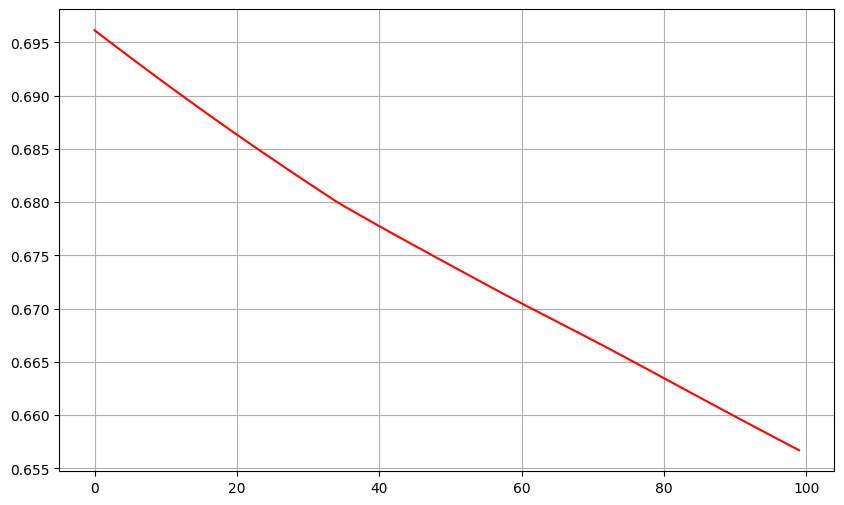

Los efectos independientes son:
 [[-0.36910698]
 [ 1.3807951 ]
 [-0.5738893 ]
 [-0.19815612]
 [-0.52190304]]
La variable de entrada 1 tiene un efecto negativo sobre la salida.
La variable de entrada 2 tiene un efecto positivo sobre la salida.
La variable de entrada 3 tiene un efecto negativo sobre la salida.
La variable de entrada 4 tiene un efecto negativo sobre la salida.
La variable de entrada 5 tiene un efecto negativo sobre la salida.


In [ ]:
# Seleccionar las variables de entrada
XD1 = np.array(XDB[['Age','MemoryComplaints','BehavioralProblems','Confusion','DifficultyCompletingTasks']])

# Seleccionar la variable objetivo
yp1 = np.array(XDB[['Diagnosis']])

# 2. Normalizar los datos de entrada y salida
XDn = XD1 / np.max(XD1, axis=0)
yp = yp1 #/ np.max(yp1, axis=0)

print("Los datos de entrada normalizados son: \n", XDn)  # Mostrar las primeras 5 filas
print("Los datos de salida normalizados son: \n", yp)  # Mostrar las primeras 5 filas


# 3. Definir el modelo
madaline_credito = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(5,), use_bias=False, activation='relu'),
    tf.keras.layers.Dense(units=1, use_bias=False, activation='sigmoid')
])

madaline_credito.summary()
madaline_credito.compile(optimizer='adam', loss='binary_crossentropy')
history_credito = madaline_credito.fit(XDn, yp, epochs=100,batch_size=5000)

# 4. Evaluar el modelo
yp2=madaline_credito.predict(XDn)
yp2_classes = (yp2 > 0.5).astype(int)

# Puedes usar la matriz de confusión como en el árbol de decisión para evaluar el modelo
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(yp, yp2_classes)
print("La matriz de confusión para la red neuronal es: \n", cm_nn)


VN= cm_nn[0,0];FP= cm_nn[0,1];VT= cm_nn[1,0];VP= cm_nn[1,1]

#Métricas de desempeño
Ex= (VP+VN)/(VP+VN+FP+VT) #Exactitud: comportamiento general prediagnostico
print("La exactitud del modelo es:\n ",Ex)

TE= (FP+VT)/(VP+VN+FP+VT) #Tasa de error: comportamiento general no prediagnostico
print("La tasa de error del modelo es:\n ",TE)

Se= VP/(VP+VT) #Sensibilidad: Comportamiento correcto prediagnostico
print("La sensibilidad del modelo es:\n ",Se)

Sp= VN/(VN+FP) #Especificidad: Comportamiento correcto no prediagnostico
print("La especificidad del modelo es:\n ",Sp)

Pr=VP/(VP+FP) #Precisión
print("La precisión del modelo es:\n ",Pr)

Neg= VN/(VN+VT) #Precisión negativa: comportamiento correcto no prediagnostico
print("La precisión negativa del modelo es:\n ",Neg)


dfcorr2=pd.DataFrame(np.column_stack((yp2,yp)))
print("La correlación entre es:\n",dfcorr2.corr())


# 5. Visualización de la pérdida durante el entrenamiento
ek = history_credito.history['loss']

plt.figure(figsize=(10, 6))
plt.plot(ek, 'r', label='Pérdida en entrenamiento')
plt.grid(True)
plt.show()

# 6. Efectos independientes
WC= madaline_credito.get_weights()
W=WC[0]; C=WC[1]
a=W@C #Estos son los efectos independientes
print("Los efectos independientes son:\n",a)

for i, val in enumerate(a):
    signo = 'positivo' if val >= 0 else 'negativo'
    print(f"La variable de entrada {i+1} tiene un efecto {signo} sobre la salida.")

**Análisis de Resultados Evaluación del modelo MADALINE**


Para la tarea de predecir el Diagnosis (si una persona era enferma de Alzheimer o no), se implementó una red neuronal con una arquitectura tipo MADALINE. Esta configuración incluye una capa densa oculta de 10 neuronas con activación ReLU y una capa de salida con una única neurona, utilizando la función de activación sigmoid para producir una probabilidad de aprobación. El modelo fue entrenado con las 5 variables de entrada clave de los pacientes, previamente normalizadas.

El modelo de red neuronal tipo MADALINE, configurado para predecir el Diagnosis (enfermo/no enfermo) mostró un rendimiento generalmente positivo. Donde a pesar que se tiene una especificidad muy alta (89%) para identificar correctamente a los no enfermos, el modelo tuvo una sensibilidad del 37%, lo que demuestra que le cuesta identificar a los enfermos. Asimismo, su exactitud tuvo un porcentaje importante (70%), al igual que la tasa de error (30%), corroborando así el buen funcionamiento de forma general del modelo, sin embargo, podría ser mejorado con el fin de identificar mejor quienes son los enfermos de Alzheimer.




#**Conclusiones**

Finalmente, es importante mencionar que el árbol de decisión es un modelo bueno para el diagnóstico de personas enfermas de Alzheimer ya que tiene una gran capacidad para detectar aquellos que no lo son. Sin embargo, tiene un margen de mejora a la hora de analizar a los que si están enfermos, y es algo que está demostrado en su sensbilidad. Para optimizar el uso del modelo, sería fundamental evaluar el equilibrio entre los falsos postivos y falsos negativos. Esto podría lograrse modificando el umbral de decisión, o implementando técnicas de balanceo de datos para mejorar la detección de sus pacientes en general sin comprometer la solidez en la identificación de no enfermos.

Por otro lado, la red neuronal tipo MADALINE mostró resultados similares a los del árbol de decisión, donde se es bueno analizando a aquellos que no son diagnosticado enfermos, teniendo una tasa de error relativamente baja. Sin embargo, el margen de mejora de este modelo también está de la mano con los falsos positivos.